In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import datasets
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import gzip

from tsne import *

## Basic digits

In [3]:
X, y = datasets.load_digits(return_X_y=True)

In [5]:
def show_tsne(X, y, T=1000, perp=30, l=200, verbose=False, filename=None):
    np.random.seed(123)
    res = tsne(X, T=T, l=l, perp=perp, verbose=verbose)
    plt.scatter(res[:, 0], res[:, 1], s=20, c=y)
    if filename is not None:
        plt.savefig('imgs/' + filename)
    plt.show()

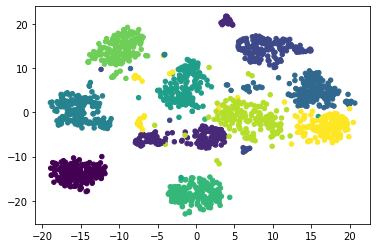

In [6]:
show_tsne(X, y, T=1000, l=200, perp=60, filename='digits.png')

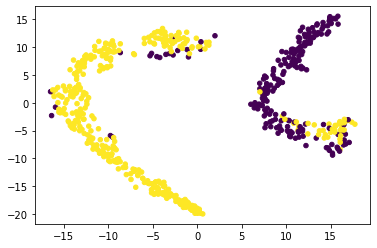

In [8]:
X2, y2 = datasets.load_breast_cancer(return_X_y=True)
show_tsne(X2, y2, T=500, l=200, perp=40, filename='cancer.png')

In [49]:
X2.shape

(569, 30)

## Scalability testing

In [9]:
image_size = 784
num_images = 60000

f = gzip.open('data/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(image_size * num_images)
X_extra = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_extra = X_extra.reshape(num_images, image_size)

f = gzip.open('data/train-labels-idx1-ubyte.gz','r')
magic_number = int.from_bytes(f.read(4), 'big')
label_count = int.from_bytes(f.read(4), 'big')
label_data = f.read()
y_extra = np.frombuffer(label_data, dtype=np.uint8)

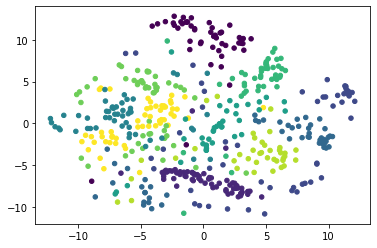

In [51]:
show_tsne(X_extra[:500], y_extra[:500], perp=40, T=500, filename='bigmnist.png')

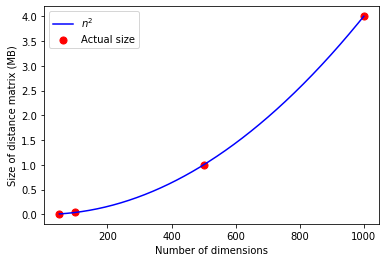

In [16]:
# below values where obrained by measuring pariwise distance matrix size while changing the data size
num_imgs = np.array([50, 100, 500, 1000])
nbytes = np.array([10000, 40000, 1000000, 4000000]) * 1e-6
xt = np.linspace(np.min(num_imgs), np.max(num_imgs), 500)

plt.plot(xt, np.power(xt,2)*4e-6, label='$n^2$', color='blue')
plt.scatter(num_imgs, nbytes, label='Actual size', color='red', s=50)
plt.xlabel('Number of dimensions')
plt.ylabel('Size of distance matrix (MB)')
plt.legend()
plt.savefig('imgs/scalability.png')
plt.show()

## Shapes

In [29]:
def plot2d(data, labels, perps=[30], iters=400, filename=None):
    np.random.seed(123)
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.title('Original')
    plt.axis('square')
    if filename is not None:
        plt.savefig(f'imgs/{filename}_orig.jpg')
    plt.show()
    
    for perp in perps:
        plt.figure(figsize=(5, 5))
        plt.axis('off')
        res = tsne(data, T=iters, l=200, perp=perp)
        plt.scatter(res[:, 0], res[:, 1], s=20, c=labels)
        plt.title(f'Perplexity: {perp}')
        plt.axis('square')
        if filename is not None:
            plt.savefig(f'imgs/{filename}_perp_{perp}.jpg')
        plt.show()

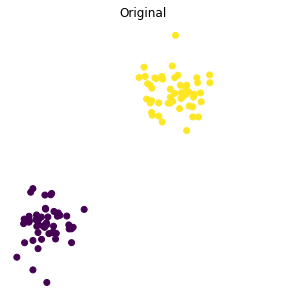

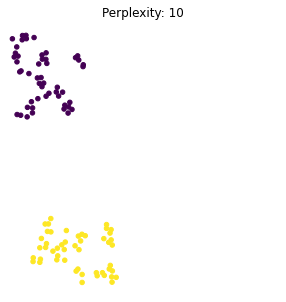

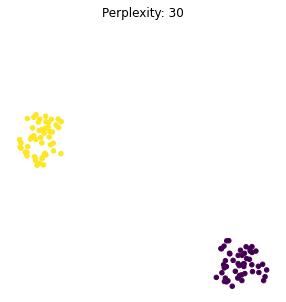

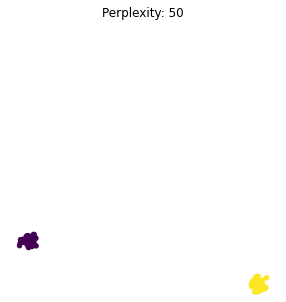

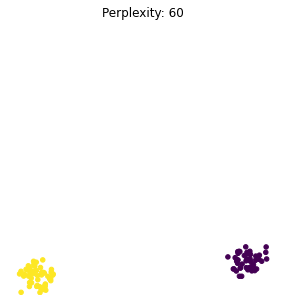

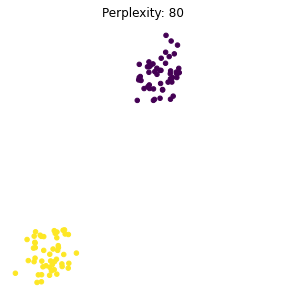

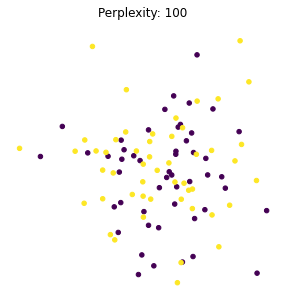

In [30]:
size = 50
d1 = np.random.multivariate_normal([-5, -5], 2*np.eye(2), size=size)
d2 = np.random.multivariate_normal([5, 5], 2*np.eye(2), size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perps=[10,30,50,60,80,100])

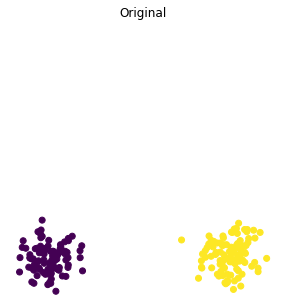

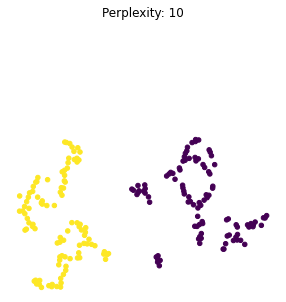

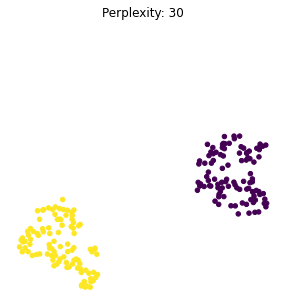

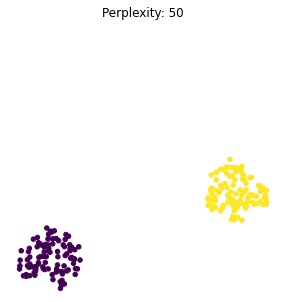

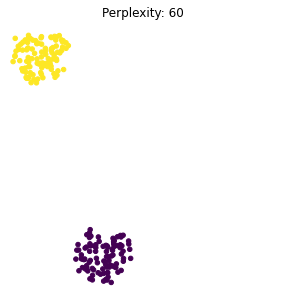

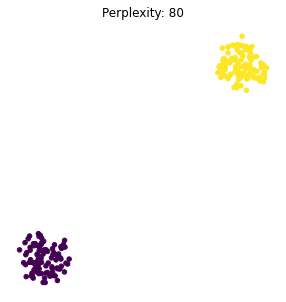

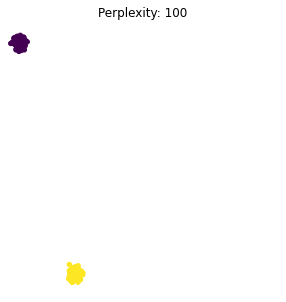

In [31]:
size = 100
d1 = np.random.multivariate_normal([-8, 0], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([8, 0], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perps=[10,30,50,60,80,100], filename='two')

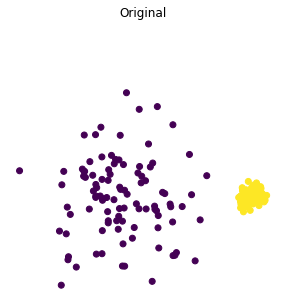

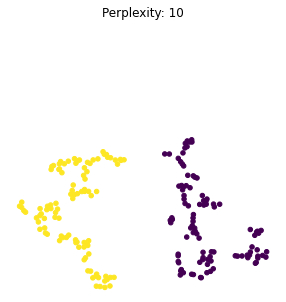

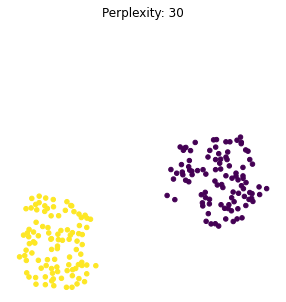

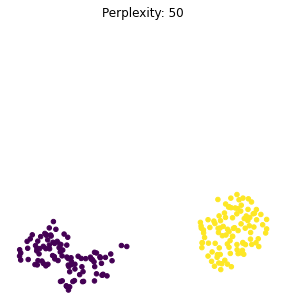

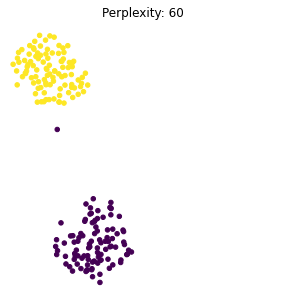

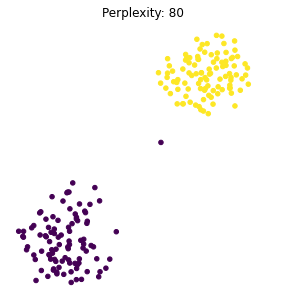

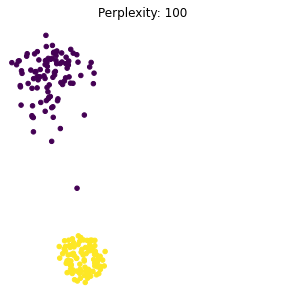

In [32]:
size = 100
d1 = np.random.multivariate_normal([-8, 0], [[20,0],[0,20]], size=size)
d2 = np.random.multivariate_normal([8, 0], [[0.5,0],[0,0.5]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perps=[10,30,50,60,80,100], filename='separate_variance')

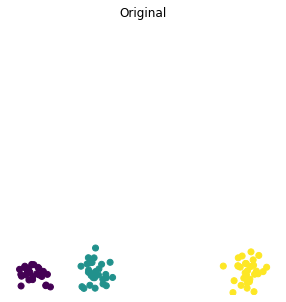

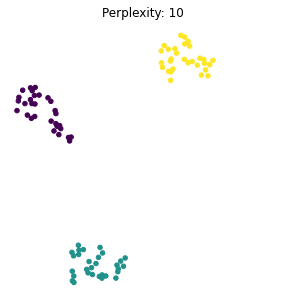

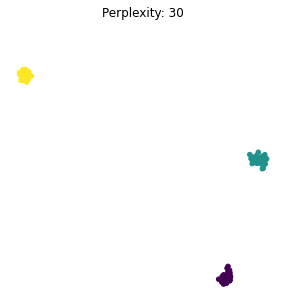

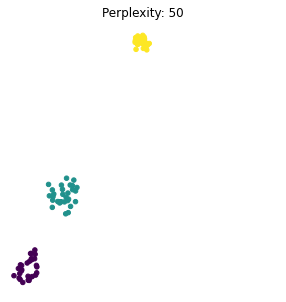

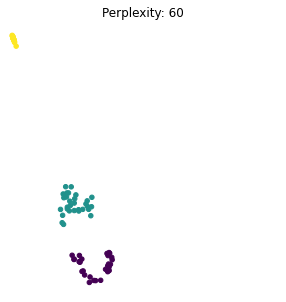

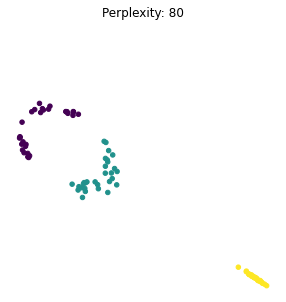

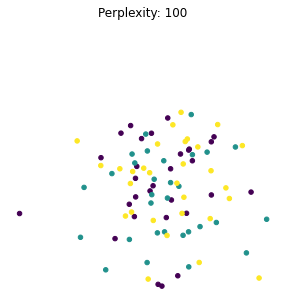

In [33]:
size = 30
d1 = np.random.multivariate_normal([-5, 0], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([5, 0], [[2,0],[0,2]], size=size)
d3 = np.random.multivariate_normal([30, 0], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2, d3), axis=0)
l = [0] * size + [1] * size + [2] * size
plot2d(d, l, perps=[10,30,50,60,80,100], filename='distance')

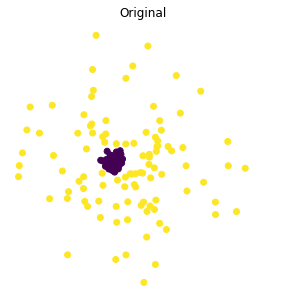

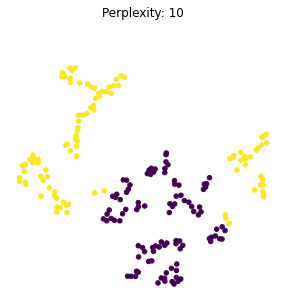

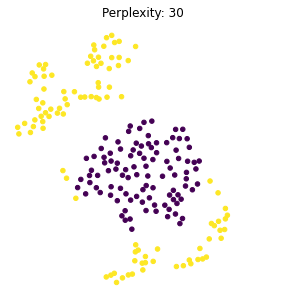

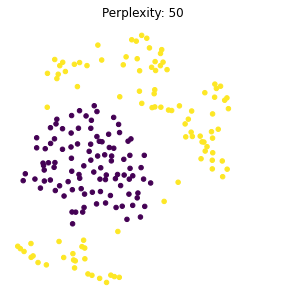

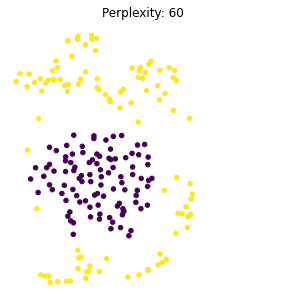

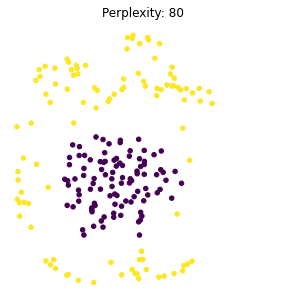

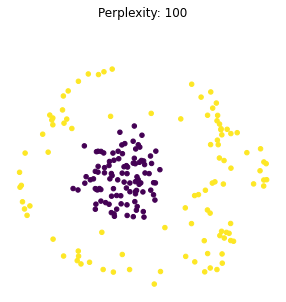

In [34]:
size = 100
d1 = np.random.multivariate_normal([0, 0], [[0.5,0],[0,0.5]], size=size)
d2 = np.random.multivariate_normal([0, 0], [[80,0],[0,80]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perps=[10,30,50,60,80,100], filename='inside_variance')

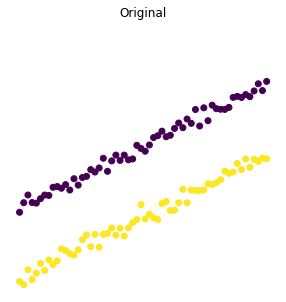

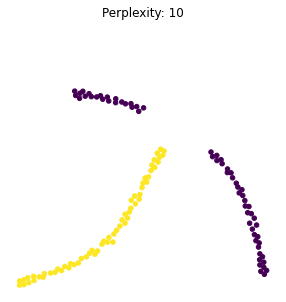

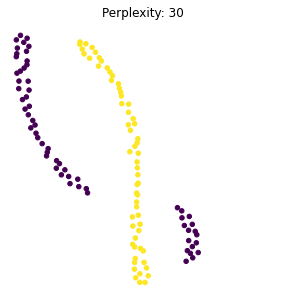

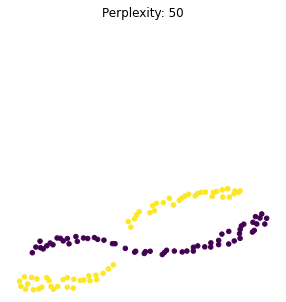

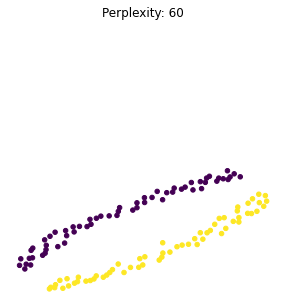

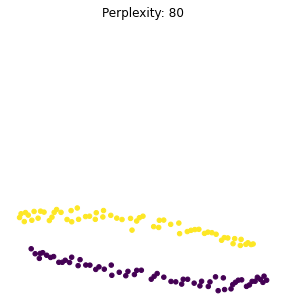

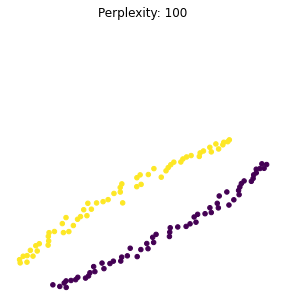

In [35]:
size = 60
xt = np.linspace(0,100,size)
d1 = xt * 0.5 + 30 + np.random.normal(0,2,size=size)
d2 = xt * 0.5 + 1 + np.random.normal(0,2,size=size)
d = np.concatenate((d1.reshape([-1,1]), d2.reshape([-1,1])), axis=0)
tmp = np.concatenate((xt.reshape([-1,1]),xt.reshape([-1,1])), axis=0)
d = np.concatenate((tmp, d), axis=1)
l = [0] * size + [1] * size
plot2d(d, l, perps=[10,30,50,60,80,100], filename='linear')

## Projection to 1D

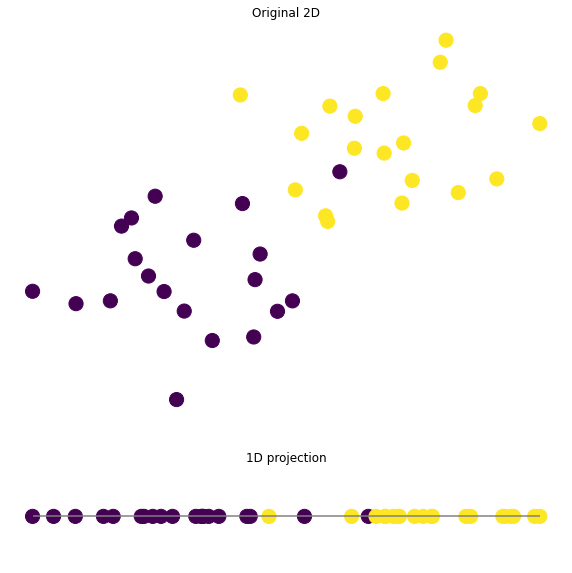

In [42]:
np.random.seed(123)
size = 20
# plt.figure(figsize=(20,8))
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10), gridspec_kw={'height_ratios': [4, 1]})
d1 = np.random.multivariate_normal([-2, -2], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([2, 2], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = np.array([0] * size + [1] * size)
yy = tsne(d, ydim=1, perp=30, T=50, l=100)

ax1.scatter(d[:, 0], d[:, 1], s=200, c=l)
ax1.set_title('Original 2D')
ax1.axis('off')

ax2.scatter(np.append(yy[l==0], yy[l==1]), len(l)*[0], s=200, c=np.append(l[l==0], l[l==1]))
ax2.hlines(0,min(yy),max(yy), color='gray')
ax2.set_title('1D projection')
ax2.axis('off')
plt.savefig('imgs/1dprojection.jpg')
plt.show()

In [26]:
import imageio
import os

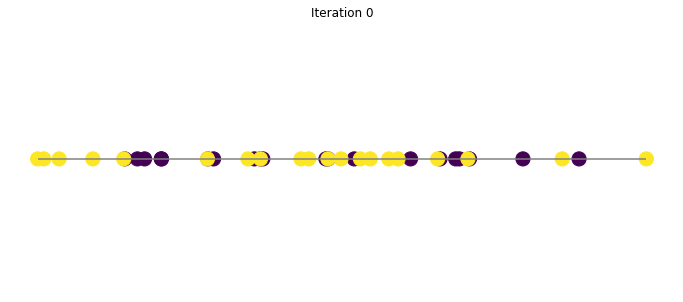

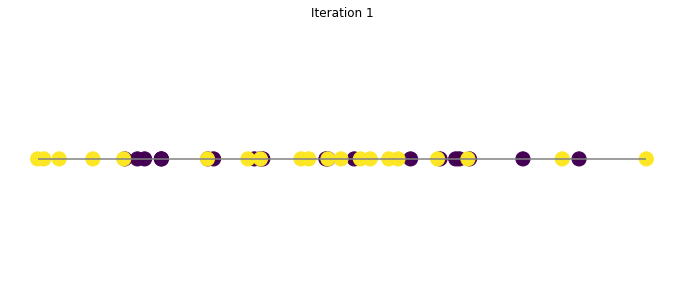

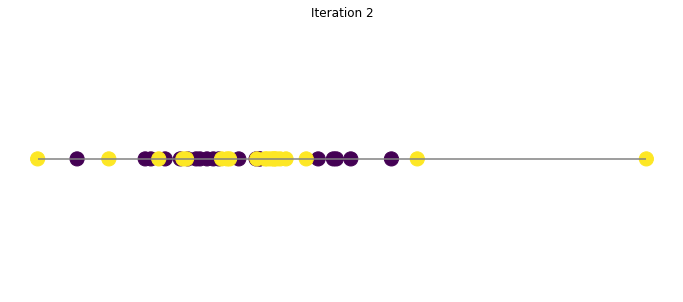

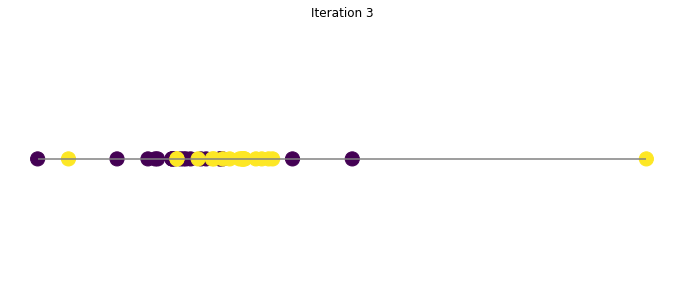

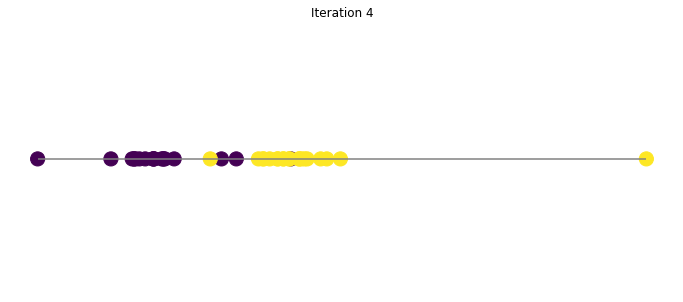

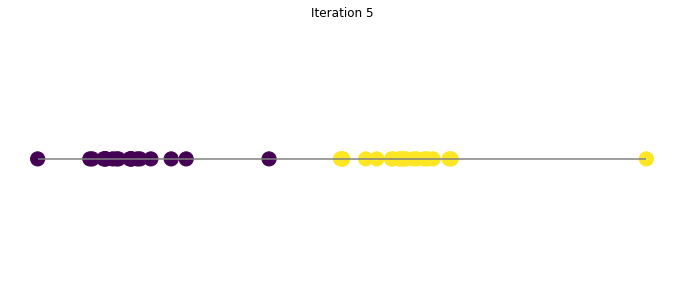

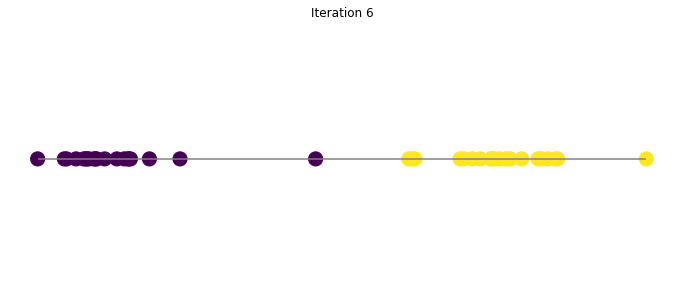

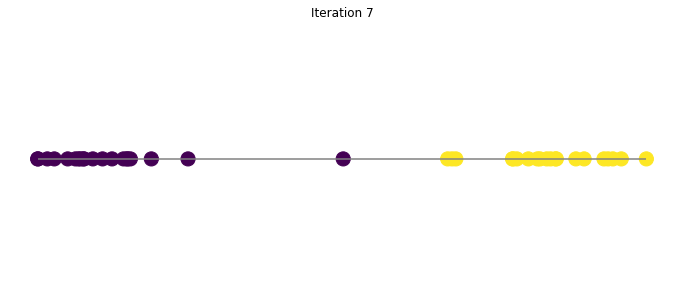

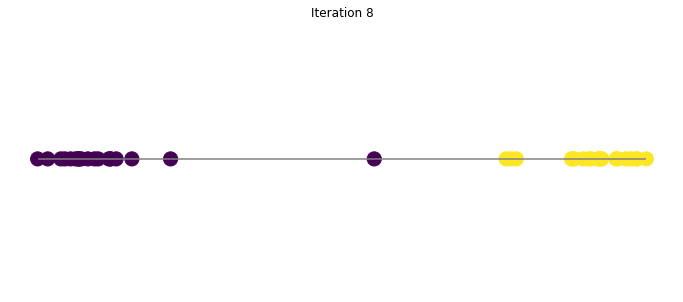

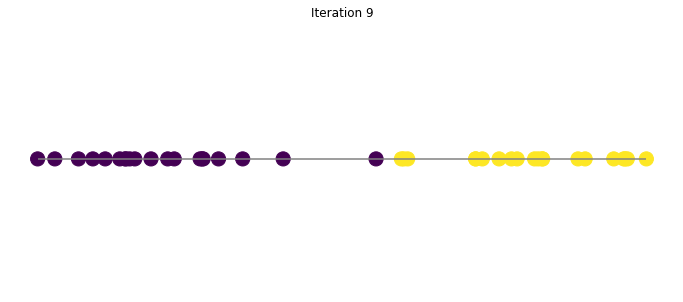

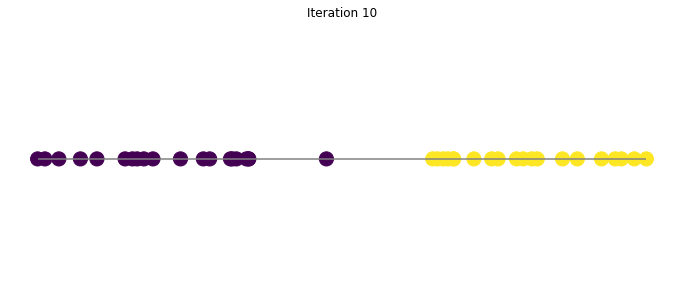

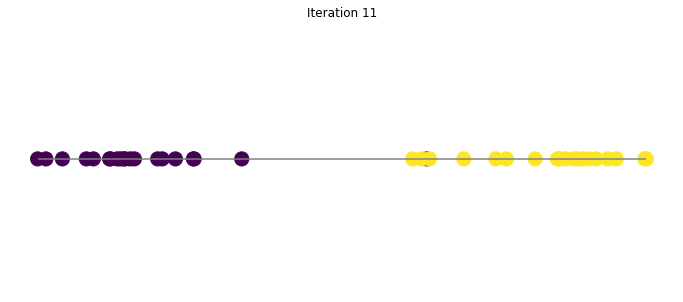

In [46]:
np.random.seed(123)
size = 20

d1 = np.random.multivariate_normal([-3, -3], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([3, 3], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = np.array([0] * size + [1] * size)
yyy = tsne_gif(d, ydim=1, perp=30, T=10, l=100)


# plt.scatter(yy[l==0], len(l[l==0])*[0], c=len(l[l==0])*[0])
# plt.scatter(yy[l==1], len(l[l==1])*[0], c)
for i, yy in enumerate(yyy):
    if i in list(range(0,len(yyy),1)):
        plt.figure(figsize=(12,5))
        plt.title(f'Iteration {i}')
        plt.scatter(np.append(yy[l==0], yy[l==1]), len(l)*[0], s=200, c=np.append(l[l==0], l[l==1]))
        plt.hlines(0,min(yy),max(yy), color='gray')
        plt.axis('off')
        plt.savefig(f'tmp/{str(i).zfill(3)}.png')

In [47]:
ims = []
ll = os.listdir('tmp')
ll.sort()
for file in ll:
    ims.append(imageio.imread('tmp/' + file))
imageio.mimsave('imgs/1d.gif', ims, duration=1)

## Hyper tuning

Exceeded max iterations, returning 1.000000788860905e-20 with value [1797.]


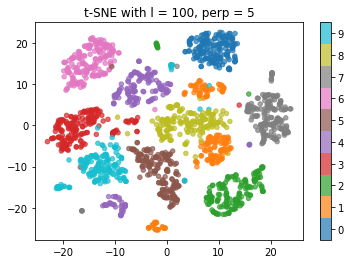

Exceeded max iterations, returning 1.000000788860905e-20 with value [1797.]


KeyboardInterrupt: 

In [244]:
l = np.array([100,250,400,800,1200])
perps = np.array([5,10,20,30,40,50,60])

hyperparam_combination = np.array(np.meshgrid(l,perps)).T.reshape(-1,2)

for i in hyperparam_combination:
    l = i[0]
    perp = i[1]

    res = tsne(X, l=l, perp=perp, verbose=False)
    plt.scatter(res[:, 0], res[:, 1], s=20, c=y, cmap=plt.cm.tab10, vmin=-0.5, vmax=9.5, alpha=0.7)
    plt.title("t-SNE with l = "+str(l)+", perp = "+str(perp))
    plt.colorbar(ticks=range(10))

    plt.show()